In [94]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import re


def load_json_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return pd.DataFrame(data['data'])

def jitter_labels(y, sigma=0.05):
    """Adding random noise to the data"""
    return np.clip(np.random.normal(y, sigma), 0, 1)

# Data from Homepage
data is from API

In [95]:
link_homepage = '../data/homepage_posts_data.json'
df_homepage = load_json_to_dataframe(link_homepage)

In [96]:
df_homepage.columns

Index(['id', 'created_at', 'title', 'slug', 'description', 'source', 'author',
       'published_at', 'votes', 'voted', 'comments', 'tags', 'hot', 'adult',
       'media', 'editable', 'deletable', 'resource', 'actions', 'archive',
       'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable',
       'recommended', 'family_friendly', 'favourite', 'alerts', 'ama'],
      dtype='object')

In [97]:
df_homepage = df_homepage.drop(columns=[
    'created_at', 'source', 'slug', 'published_at', 'hot', 'adult', 'media', 'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable', 'editable', 'deletable', 'resource', 'actions', 'archive', 'recommended', 'family_friendly', 'favourite', 'ama', 'voted'
])

In [98]:
df_homepage['author'] = df_homepage['author'].apply(lambda x: x['username'])
df_homepage['downvotes'] = df_homepage['votes'].apply(lambda x: x['down'])
df_homepage['votes'] = df_homepage['votes'].apply(lambda x: x['up'])

In [99]:
df_homepage

,id,title,description,author,votes,comments,tags,alerts,downvotes
0,7766021,Pracujących Polaków nie stać nawet na metr mie...,Polaków nie stać na zakup nawet 1 m kw. mieszk...,ross-flow,485,"{'hot': False, 'count': 222}","[nieruchomosci, wynajem, rynekwtorny, mieszkania]",[],13
1,7798801,"Owczarki zaatakowały jamnika. Brutus nie żyje,...",To był spacer jak każdego innego dnia. Nagle ł...,coiber,631,"{'hot': False, 'count': 101}","[lodz, psy, pies, psiarze, bekazpodludzi]",[],30
2,7667729,Mocne oświadczenie PZN po aferze w skokach. Li...,Tymczasowe zawieszenie sztabu szkoleniowego i ...,Bobito,288,"{'hot': False, 'count': 56}","[sport, skoki, skokinarciarskie, swiat]",[],4
3,7798789,Jak ojciec Sebastiana M. stracił milion złotyc...,"Właścicielem pojazdu był Jarosław M., ojciec S...",Kolekcjoner_dusz,707,"{'hot': False, 'count': 207}","[sebastianmajtczak, majtczak, polskiedrogi, wy...",[],4
4,7766029,zus anulował rente,"mieszkanka Szczecina, miała 27 lat, gdy straci...",stefan_1971,458,"{'hot': False, 'count': 123}","[zus, renta]",[],10
...,...,...,...,...,...,...,...,...,...
9858,7733231,xcancel.com - przeglądaj twitty I odpowiedzi b...,"W sumie trochę mnie dziwi, ze ta stronka nie j...",Returned,438,"{'hot': False, 'count': 32}","[technologia, twitter, lifehack, internet]",[],5
9859,7700465,Tani sposób Niemców na oczyszczanie wody. W Po...,"Nowe badanie pokazuje, że mikroplastiki i toks...",Rasteris,427,"{'hot': False, 'count': 53}","[woda, przyroda, nauka, technika, las]",[],9
9860,7798775,"Zabił rodzinę, uciekł ze szpitala. Dożywocia n...","Prokuratura żądała dożywocia, sąd się na to ni...",ZobaczLink,235,"{'hot': False, 'count': 28}","[polska, prawo, sadowehistorie, kryminalne, mo...",[],1
9861,7733241,Zabrali i umieścili w rodzinie zastępczej. Czt...,Policja odebrała i umieściła w rodzinie zastęp...,Kolekcjoner_dusz,543,"{'hot': False, 'count': 185}","[warszawa, policja, afera]",[],58


# Data from id scan

In [100]:
# link = '../data/final_combined_results_7631933-7651933.json' # recent posts
link = '../data/final_combined_results_2937495-7229337.json' # from the same range from misinformation repo
df_id = load_json_to_dataframe(link)

In [101]:
df_id.columns

Index(['id', 'status', 'url', 'proxy', 'error', 'title', 'points',
       'description', 'added_date', 'tags', 'alerts', 'comments'],
      dtype='object')

In [102]:
df_id = df_id[df_id['error'].isna()]

In [103]:
df_id = df_id.drop(columns=['status', 'proxy', 'error']).reset_index(drop=True)

In [104]:
alerts_df_id = df_id[df_id['alerts'].notna()]
alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))
print("Count of alerts: ", len(alerts_df_id))

# Check if all alerts are either 'zakopane' or 'duplikat'
zakopane_duplikat = (alerts_df_id['zakopane'] | alerts_df_id['duplikat']).all()

if zakopane_duplikat:
    print("All alerts are either 'zakopane' or 'duplikat'")
    
    # Remove the 'alerts' column as it is no longer needed
    alerts_df_id = alerts_df_id.drop(columns=['alerts'])

    # can remove duplicates now
    alerts_df_id = alerts_df_id[~alerts_df_id['duplikat']].drop(columns=['duplikat'])

Count of alerts:  2384


C:\Users\juziu\AppData\Local\Temp\ipykernel_35680\3722623095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
C:\Users\juziu\AppData\Local\Temp\ipykernel_35680\3722623095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))


## Get comments and see if they contain information about manipulation and check their points

**NOTE**: this is still important to check because word 'manipulation' can also not address the original post

In [105]:
# content: None means that there was some multimedia posted and no text
df_id['comments_content_points'] = df_id['comments'].apply(lambda x: [(c['content'], c['points']) for c in x if c['content'] is not None])

In [106]:
import re
pattern = re.compile(r'\bmanipula\w*\b', flags=re.IGNORECASE)

df_id['mentions_manipulation'] = df_id['comments_content_points'] \
    .apply(lambda list_c:
        any(pattern.search(c[0]) for c in list_c if isinstance(c[0], str))
    )

In [107]:
df_id['top_manipulation_comment'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if pattern.search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

## Is comment containing 'informacja nieprawdziwa' or 'nieprawdziwa informacja'

In [108]:
df_id['comment_informacja_nieprawdziwa'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if re.compile(r'informacja nieprawdziwa|nieprawdziwa informacja', re.IGNORECASE).search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

In [109]:
df_id['comment_informacja_nieprawdziwa'].notna().sum()

np.int64(59)

In [110]:
comment_informacja_nieprawdziwa_points = df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['comment_informacja_nieprawdziwa'].apply(lambda x: x[1])\
      / df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['points'].abs()

df_id.loc[comment_informacja_nieprawdziwa_points.index, 'score_informacja_nieprawdziwa'] = comment_informacja_nieprawdziwa_points

### Method involves label smoothing - model will not generalize well possibly

In [111]:
df_id.loc[alerts_df_id.index, 'score_zakopane_fuzzy'] = np.clip(
    np.random.normal(loc=0.7, scale=0.05, size=len(alerts_df_id.index)),
    0, 1
)

df_id.loc[alerts_df_id.index, 'score_zakopane'] = 0.7

In [112]:
df_id['scores_fuzzy'] = df_id[['score_informacja_nieprawdziwa', 'score_zakopane_fuzzy']].sum(axis=1, skipna=True).fillna(0)
df_id['scores'] = df_id[['score_informacja_nieprawdziwa', 'score_zakopane']].sum(axis=1, skipna=True).fillna(0)

In [113]:
# only for the fuzzy values
df_id.loc[df_id[df_id['scores_fuzzy'] == 0].index, 'scores_fuzzy'] = np.clip(
    np.random.normal(loc=0, scale=0.05, size=len(df_id[df_id['scores_fuzzy'] == 0].index)),
    0, 1
)

In [114]:
df_id = df_id.rename(columns={'points': 'votes'})

# Data from Misinformation archive
https://wykoppl-informacjanieprawdziwa.surge.sh/

In [115]:
df_misinfo = load_json_to_dataframe('../data/mssinfo_wykop_posts.json')

In [116]:
df_misinfo['scores'] = 1

df_misinfo['scores_fuzzy'] = np.clip(
    np.random.normal(loc=1, scale=0.05, size=len(df_misinfo.index)),
    0, 1
)

# Analysis

Data From ID scan: `df`  
Data from homepage: `df_homepage`  
Data from misinfo list: `df_misinfo`

In [117]:
df_homepage.columns

Index(['id', 'title', 'description', 'author', 'votes', 'comments', 'tags',
       'alerts', 'downvotes'],
      dtype='object')

For now, `df_homepage` is not yet to be joined because the comments are not fetched

In [118]:
df_id.columns

Index(['id', 'url', 'title', 'votes', 'description', 'added_date', 'tags',
       'alerts', 'comments', 'comments_content_points',
       'mentions_manipulation', 'top_manipulation_comment',
       'comment_informacja_nieprawdziwa', 'score_informacja_nieprawdziwa',
       'score_zakopane_fuzzy', 'score_zakopane', 'scores_fuzzy', 'scores'],
      dtype='object')

In [119]:
df_misinfo.columns

Index(['id', 'url', 'title', 'description', 'added_date', 'author', 'tags',
       'alerts', 'votes', 'downvotes', 'scores', 'scores_fuzzy'],
      dtype='object')

In [120]:
df_id_ready = df_id.drop(columns=[
    'id', 'url', 'added_date', 'alerts', 'comments', 'comments_content_points', 
    'mentions_manipulation', 'top_manipulation_comment', 'comment_informacja_nieprawdziwa',
    'score_informacja_nieprawdziwa', 'score_zakopane'
    ]
)

In [121]:
df_id_ready.head()

,title,votes,description,tags,score_zakopane_fuzzy,scores_fuzzy,scores
0,Pitbull Nowe porządki [Online] Pitbull Cały Fi...,0.0,Pitbull Nowe porządki [Online] Pitbull Cały Fi...,[],0.669652,0.669652,0.7
1,Zamachowiec z Brukseli pracował jako sprzątacz...,488.0,Jeden z zamachowców z Brukseli pracował przez ...,"[polityka, zamach, terroryzm]",NaN,0.000000,0.0
2,Będzie referendum ws. imigrantów w Polsce! - k...,16.0,https://facebook.com/IndependentVideoPress Będ...,[polska],NaN,0.075584,0.0
3,Nóż otwiera się w kieszeni - Szef klubu PO Pol...,7.0,Oczywiście nie mógł powiedzieć o niej ani jedn...,"[polska, polityka, kultura, wykop, korwin, kukiz]",NaN,0.110402,0.0
4,None,5.0,"""Wyjmują nóż, grożą kierowcom, niszczą towar, ...","[polska, europa, swiat, ekonomia, polityka, im...",NaN,0.006270,0.0


In [122]:
df_misinfo_ready = df_misinfo.drop(columns=[
    'id', 'url', 'added_date', 'author', 'alerts', 'downvotes'
    ]
)

In [123]:
df_misinfo_ready.head()

,title,description,tags,votes,scores,scores_fuzzy
0,We Francji spokojnie. W sylwestra spalono tylk...,"W noc sylwestrową we Francji spalono ""tylko"" 9...","[europa, swiat, imigranci, ciekawostki, francja]",2305,1,1.000000
1,[Afera Prezydencka] Moderator fDy,A gdyby tak większa ilość użytkowników #wykop ...,"[wykop, afera, aferaprezydecka, lechwalesacont...",428,1,1.000000
2,Szczera wypowiedź Tomasza Lisa,pan redaktor w końcu powiedział co tak naprawd...,"[polityka, heheszki, lisnadzis, kod, media]",1357,1,1.000000
3,Inwazja zombie-islamu na Europę stała się fakt...,Zobaczcie jak przybysze bawią się z Niemką w c...,"[europa, islam, imigranci, kolonia, uchodzcy, ...",145,1,0.972894
4,Czy tak wyglądały ataki w Koloni w Nowy Rok?,Podejrzewam że to dopiero początek wrzut tego ...,"[europa, imigranci, islam]",33,1,1.000000


In [124]:
df = pd.concat([df_misinfo_ready, df_id_ready], ignore_index=True)

In [125]:
df['scores'] = df['scores'].apply(lambda x: min(1, max(0, x)))
df['scores_fuzzy'] = df['scores_fuzzy'].apply(lambda x: min(1, max(0, x)))

<Axes: ylabel='Frequency'>

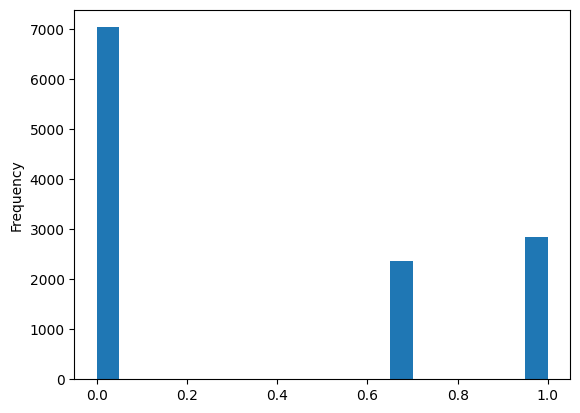

In [126]:
df['scores'].sort_values().plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

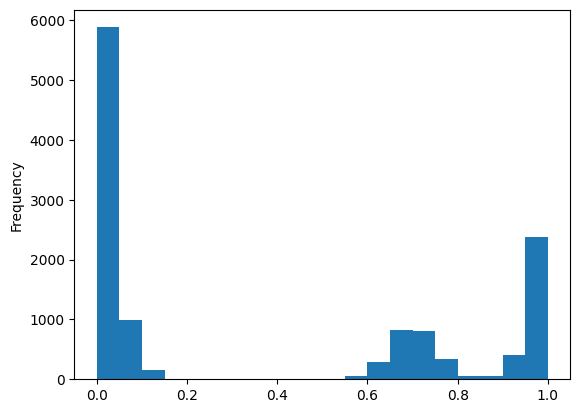

In [127]:
df['scores_fuzzy'].sort_values().plot(kind='hist', bins=20)

# Preparing the data

In [128]:
df["text"] = (
    df["title"].fillna('') + " " +
    df["description"].fillna('') + " " +
    df["tags"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
)

# Alternative way - exclude the tags, they might be too much of an outlier
df['clean_text_no_tags'] = (
    df["title"].fillna('') + " " +
    df["description"].fillna('')
)

In [129]:
def clean_text(t):
    def _normalize_polish_characters(text):
        mapping = {
            "ą": "a", "ć": "c", "ę": "e", "ł": "l",
            "ń": "n", "ó": "o", "ś": "s", "ź": "z", "ż": "z",
            "Ą": "A", "Ć": "C", "Ę": "E", "Ł": "L",
            "Ń": "N", "Ó": "O", "Ś": "S", "Ź": "Z", "Ż": "Z"
        }
        for k, v in mapping.items():
            text = text.replace(k, v)
        return text
    t = t.lower()
    t = _normalize_polish_characters(t)
    t = re.sub(r"http\S+", "", t)
    t = re.sub(r"[^a-z0-9\s]", "", t)
    return t.strip()

df["clean_text"] = df["text"].apply(clean_text)

# Remove duplicates
df = df[~df['clean_text'].duplicated()].reset_index(drop=True)

In [130]:
df['clean_text'].head()

0    we francji spokojnie w sylwestra spalono tylko...
1    afera prezydencka moderator fdy a gdyby tak wi...
2    szczera wypowiedz tomasza lisa pan redaktor w ...
3    inwazja zombieislamu na europe stala sie fakte...
4    czy tak wygladaly ataki w koloni  w nowy rok p...
Name: clean_text, dtype: object

In [131]:
df.shape

(12168, 10)

In [132]:
df.columns

Index(['title', 'description', 'tags', 'votes', 'scores', 'scores_fuzzy',
       'score_zakopane_fuzzy', 'text', 'clean_text_no_tags', 'clean_text'],
      dtype='object')

## Comparison between data prep file

In [133]:
from data_prep import prepare_data
import numpy as np

# Optional: reproducible fuzzy scores
np.random.seed(42)

df_prep, _, _ = prepare_data(
    id_file=r"../data/final_combined_results_2937495-7229337.json",
    homepage_file=r"../data/homepage_posts_data.json",
    misinfo_file=r"../data/mssinfo_wykop_posts.json",
)

# Initial model

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["scores"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=2
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = Ridge(alpha=1.0)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.32304778373600085
R²: 0.23588604898226762


In [135]:
for pr, ts, x_ts, _ in zip(y_pred, y_test, X_test, range(10)):
    print(pr, ts, x_ts)

0.16433472420933015 0.7 maz musial wiedziec ze jest dziewica oto co wtedy robila w sredniowieczu dziewictwo bylo na wage zlota od tego czy maz uwierzy w czystosc swiezo poslubionej partnerki zalezala jej reputacja a czesto tez renoma calej rodziny polska europa swiat historia
0.3449266180754473 1.0 warszawa ukrainiec uzbrojony w siekiere zaatakowal policjantow na moscie poniatowskiego zatrzymany do kontroli drogowej kierowca zaatakowal patrol siekiera  powiedzial rzecznik stolecznej policji nadkom sylwester marczak bekazlewactwa ukraina policja polska warszawa
0.9510294954378115 0.0 b11529  nowy wariant covid19 z rpa oto jak oszukuje sie ludzkosc na stronie internetowej swiatowego forum ekonomicznego z data 12 lipca 2021 znajdujemy artykul z ktorego jednoznacznie wynika ze wariant ktorego wykrycie w rpa z wielkim przytupem wlasnie ogloszono znany juz jest co najmniej od kilku miesiecy swiat rpa polityka zdrowie mutacja wirus
0.19443599740558448 0.0 wideo ducati multistrada 1200 enduro 

## Change problem to classification

In [136]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.35 else (2 if x > 0.85 else 1))

df["label"].value_counts(normalize=True)


label
0    0.578320
2    0.227071
1    0.194609
Name: proportion, dtype: float64

              precision    recall  f1-score   support

           0      0.732     0.660     0.694      1407
           1      0.335     0.401     0.365       474
           2      0.635     0.689     0.661       553

    accuracy                          0.616      2434
   macro avg      0.568     0.583     0.573      2434
weighted avg      0.633     0.616     0.622      2434



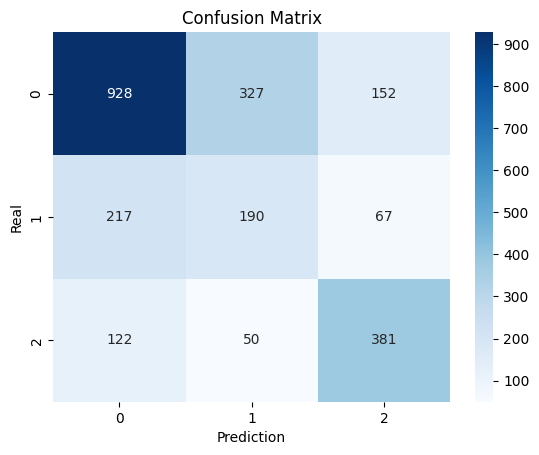

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pyplot as plt

def train_tfidf_logistic_regression_model(df, x_column: str, y_column: str, balanced=False):
    X_train, X_test, y_train, y_test = train_test_split(
        df[x_column], df[y_column], test_size=0.2, random_state=42, stratify=df["label"]
    )
    model = Pipeline([
        ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=2)),
        ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
    ])
    
    if balanced:
        # Combining for resampling
        df_train = pd.DataFrame({'clean_text': X_train, 'label': y_train})

        # Rebalancing
        majority_train = df_train[df_train.label == 0]
        minority1_train = df_train[df_train.label == 1]
        minority1_upsampled_train = resample(minority1_train, replace=True, n_samples=len(majority_train), random_state=42)
        df_train_balanced = pd.concat([majority_train, minority1_upsampled_train])
        try:
            minority2_train = df_train[df_train.label == 2]
            minority2_upsampled_train = resample(minority2_train, replace=True, n_samples=len(majority_train), random_state=42)
            df_train_balanced = pd.concat([df_train_balanced, minority2_upsampled_train])
        except ValueError:
            ...
    
        X_train_balanced = df_train_balanced['clean_text']
        y_train_balanced = df_train_balanced['label']

        model.fit(X_train_balanced, y_train_balanced)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, digits=3))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Prediction")
    plt.ylabel("Real")
    plt.title("Confusion Matrix")
    plt.show()
    
    return model

model = train_tfidf_logistic_regression_model(df, x_column="clean_text", y_column="label")

### Class balancing

In [138]:
df['label'].value_counts()[0] / df['label'].value_counts()

label
0    1.000000
2    2.546869
1    2.971706
Name: count, dtype: float64

              precision    recall  f1-score   support

           0      0.728     0.726     0.727      1407
           1      0.358     0.352     0.355       474
           2      0.658     0.671     0.664       553

    accuracy                          0.641      2434
   macro avg      0.581     0.583     0.582      2434
weighted avg      0.640     0.641     0.641      2434



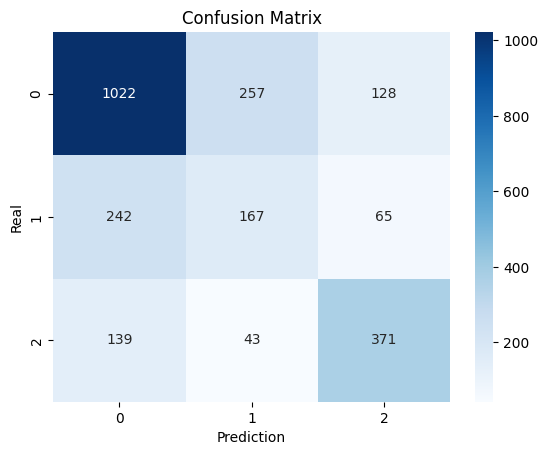

In [139]:
model = train_tfidf_logistic_regression_model(df, x_column="clean_text", y_column="label", balanced=True)

In [140]:
def show_most_important_words_multiclass(pipeline_model, top_n=15, show_discriminative=True):
    """
    pipeline_model: Pipeline with steps 'tfidf' i 'clf'
    top_n: how many words to show for each class
    show_discriminative: to show the most discrimative variable
    """
    try:
        vectorizer = pipeline_model.named_steps['tfidf']
        clf = pipeline_model.named_steps['clf']
    except Exception as e:
        raise ValueError("Model should contain Pipeline with steps: 'tfidf' i 'clf'.") from e

    feature_names = np.array(vectorizer.get_feature_names_out())
    coefs = clf.coef_
    
    if coefs.ndim == 1:
        coefs = coefs.reshape(1, -1)

    n_classes = coefs.shape[0]
    classes = clf.classes_

    for i, cls in enumerate(classes):
        if len(classes) == 2 and i == 1:
            break
        
        print(f"\n\n=== Class: {cls} (index {i}) ===")
        coef_i = coefs[i]

        top_pos_idx = np.argsort(coef_i)[-top_n:][::-1]
        print(f"\nTop {top_n} features for class {cls}:")
        for idx in top_pos_idx:
            print(f"{feature_names[idx]} ({coef_i[idx]:.4f})")

        top_neg_idx = np.argsort(coef_i)[:top_n]
        print(f"\nTop {top_n} features against class {cls}:")
        for idx in top_neg_idx:
            print(f"{feature_names[idx]} ({coef_i[idx]:.4f})")

        if show_discriminative and n_classes > 1:
            others_max = np.max(np.delete(coefs, i, axis=0), axis=0)
            discriminative_score = coef_i - others_max
            top_disc_idx = np.argsort(discriminative_score)[-top_n:][::-1]
            print(f"\nTop {top_n} the most discrimative features {cls}:")
            for idx in top_disc_idx:
                print(f"{feature_names[idx]} (diff={discriminative_score[idx]:.4f}, coef={coef_i[idx]:.4f})")
    
show_most_important_words_multiclass(model, 5)



=== Class: 0 (index 0) ===

Top 5 features for class 0:
historia (2.6976)
sport (2.3341)
gospodarka (2.3026)
technologia (2.1179)
ciekawostkihistoryczne (1.8890)

Top 5 features against class 0:
wykop (-2.7803)
lgbt (-2.4467)
szczepienia (-2.3238)
bekazlewactwa (-2.2352)
4konserwy (-2.1484)

Top 5 the most discrimative features 0:
historia (diff=3.4857, coef=2.6976)
gospodarka (diff=3.3202, coef=2.3026)
ciekawostkihistoryczne (diff=2.7155, coef=1.8890)
wydarzenia (diff=2.6857, coef=1.8682)
kosmos (diff=2.5029, coef=1.6788)


=== Class: 1 (index 1) ===

Top 5 features for class 1:
smieszne (1.8304)
ciekawostki nauka (1.7309)
subskrybuj (1.6946)
polska (1.6500)
kononowicz (1.6243)

Top 5 features against class 1:
moderacja (-2.6913)
usa (-2.2524)
zydzi (-2.2217)
afera (-2.1175)
bekazpisu (-2.0491)

Top 5 the most discrimative features 1:
smieszne (diff=2.6840, coef=1.8304)
ciekawostki nauka (diff=2.4974, coef=1.7309)
subskrybuj (diff=2.4702, coef=1.6946)
polska (diff=2.4165, coef=1.650

### Looks like many of these words are tags - they are associated with some label

Let's try to mitigate that and discard tags

              precision    recall  f1-score   support

           0      0.702     0.686     0.694      1407
           1      0.309     0.325     0.317       474
           2      0.580     0.590     0.585       553

    accuracy                          0.594      2434
   macro avg      0.531     0.533     0.532      2434
weighted avg      0.598     0.594     0.596      2434



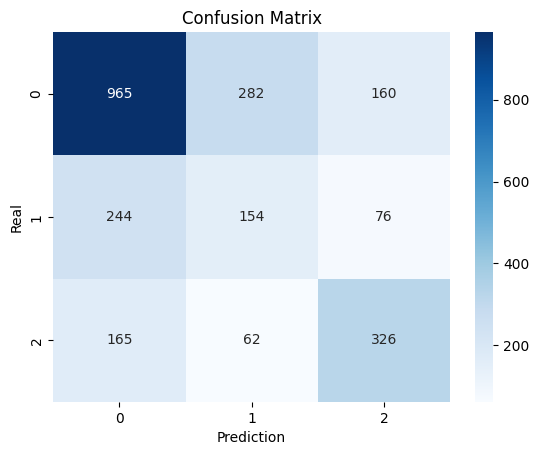



=== Class: 0 (index 0) ===

Top 5 features for class 0:
rosji (1.7603)
policjanci (1.6498)
może (1.5860)
dzięki (1.5422)
super (1.4815)

Top 5 features against class 0:
lgbt (-3.1156)
moderacja (-2.8733)
wykop (-2.7109)
covid (-2.0152)
uk (-1.7671)

Top 5 the most discrimative features 0:
policjanci (diff=2.2818, coef=1.6498)
300 (diff=2.0810, coef=1.4148)
super (diff=2.0700, coef=1.4815)
and (diff=2.0369, coef=1.4464)
nazwy (diff=2.0276, coef=1.4077)


=== Class: 1 (index 1) ===

Top 5 features for class 1:
zobacz (1.9838)
przypadki (1.6842)
subskrybuj (1.6632)
https (1.5764)
poszło (1.5722)

Top 5 features against class 1:
moderacja (-2.9735)
wykop (-2.1011)
usa (-2.0171)
dzieci (-1.8167)
tzw (-1.7593)

Top 5 the most discrimative features 1:
zobacz (diff=2.5450, coef=1.9838)
subskrybuj (diff=2.4843, coef=1.6632)
przypadki (diff=2.3950, coef=1.6842)
https (diff=2.3137, coef=1.5764)
poszło (diff=2.2151, coef=1.5722)


=== Class: 2 (index 2) ===

Top 5 features for class 2:
moderacja

In [141]:
# Retraining
model = train_tfidf_logistic_regression_model(df, x_column="clean_text_no_tags", y_column="label", balanced=True)

show_most_important_words_multiclass(model, 5)

> `THIS IS FOR THE RECENT POSTS, NOT FOR THE SAME-RANGE POSTS`

With Tags:
```sh
              precision    recall  f1-score   support

           0      0.950     0.856     0.901      1714
           1      0.925     0.995     0.958      1714
           2      0.936     0.957     0.946      1714

    accuracy                          0.936      5142
   macro avg      0.937     0.936     0.935      5142
weighted avg      0.937     0.936     0.935      5142
```

Wihtout Tags: 
```sh
              precision    recall  f1-score   support

           0      0.909     0.820     0.862      1714
           1      0.927     0.991     0.958      1714
           2      0.893     0.919     0.906      1714

    accuracy                          0.910      5142
   macro avg      0.910     0.910     0.909      5142
weighted avg      0.910     0.910     0.909      5142
```

Class 0 and 2 are the most affected - they are most likely using some tags to get better results. Class 1 is mostly not affected. The drop in effectiveness is slight - the recall is very high - which is desirable for class 1 and 2 especially.

### Try only 2 labels classification

In [142]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.5 else 1)

df["label"].value_counts(normalize=True)

label
0    0.578649
1    0.421351
Name: proportion, dtype: float64

              precision    recall  f1-score   support

           0      0.734     0.759     0.747      1408
           1      0.653     0.623     0.638      1026

    accuracy                          0.702      2434
   macro avg      0.694     0.691     0.692      2434
weighted avg      0.700     0.702     0.701      2434



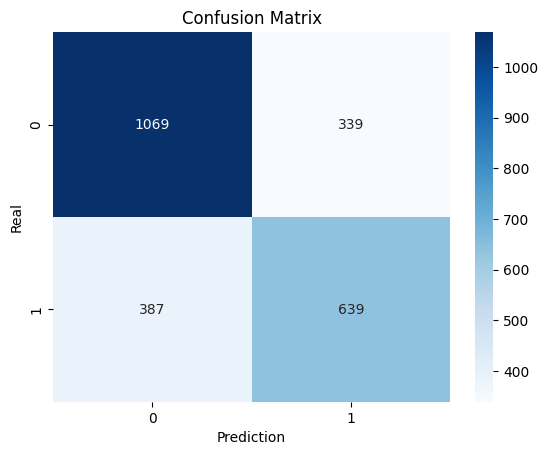

In [143]:
model = train_tfidf_logistic_regression_model(df, x_column="clean_text", y_column="label")

### With balancing

              precision    recall  f1-score   support

           0      0.716     0.796     0.754      1408
           1      0.669     0.566     0.614      1026

    accuracy                          0.699      2434
   macro avg      0.693     0.681     0.684      2434
weighted avg      0.696     0.699     0.695      2434



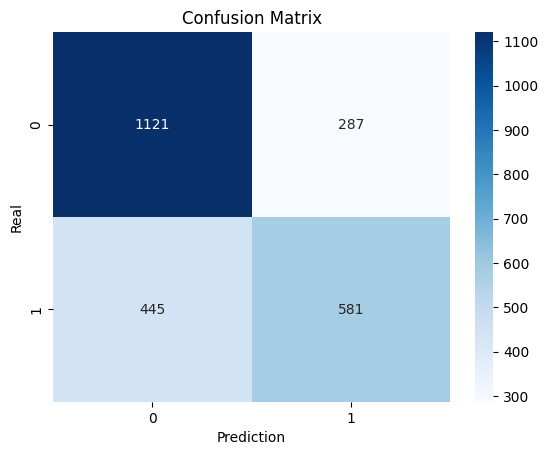

In [144]:
model = train_tfidf_logistic_regression_model(df, x_column="clean_text", y_column="label", balanced=True)

In [145]:
show_most_important_words_multiclass(model, 5)



=== Class: 0 (index 0) ===

Top 5 features for class 0:
wykop (4.1825)
bekazlewactwa (3.9562)
moderacja (3.8755)
lgbt (3.5479)
afera (3.0627)

Top 5 features against class 0:
historia (-3.0248)
gospodarka (-2.2570)
zainteresowania (-2.1052)
ciekawostki (-2.0923)
ktore (-1.9476)


### Now with excluded tags

              precision    recall  f1-score   support

           0      0.699     0.780     0.737      1408
           1      0.641     0.539     0.585      1026

    accuracy                          0.678      2434
   macro avg      0.670     0.659     0.661      2434
weighted avg      0.674     0.678     0.673      2434



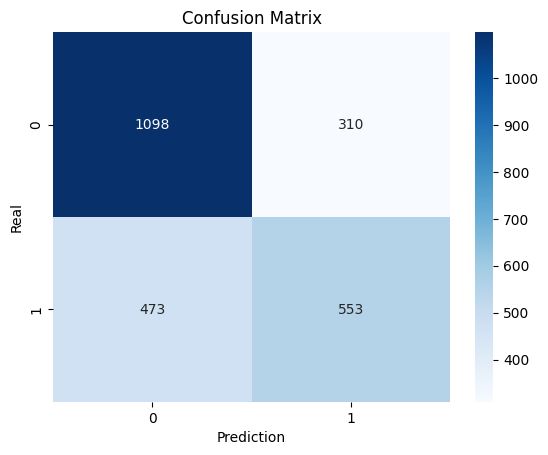



=== Class: 0 (index 0) ===

Top 5 features for class 0:
moderacja (4.7326)
lgbt (3.7395)
wykop (3.4931)
covid (2.8017)
znalezisko (2.6137)

Top 5 features against class 0:
które (-2.1012)
może (-2.0403)
tys (-1.9949)
pierwszy (-1.8878)
pierwsze (-1.8277)


In [146]:
model = train_tfidf_logistic_regression_model(df, x_column="clean_text_no_tags", y_column="label", balanced=True)

show_most_important_words_multiclass(model, 5)